In [1]:
# ====================================
# MSCS 634 – Lab 5
# Name: Komalben Suthar
# Title: Hierarchical and DBSCAN Clustering on Wine Dataset
# ====================================

# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and Explore Dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target  # Not required for clustering, but helpful for comparison

print("Dataset Head:")
display(X.head())
print("\nDataset Info:")
print(X.info())
print("\nDataset Description:")
display(X.describe())

# Step 1: Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


Dataset Head:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    flo

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000



=== Hierarchical Clustering ===


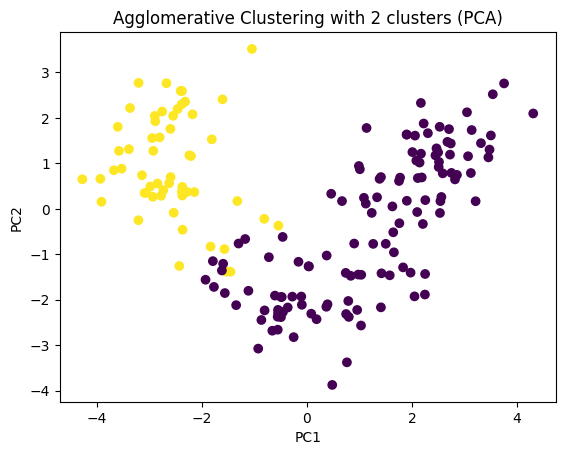

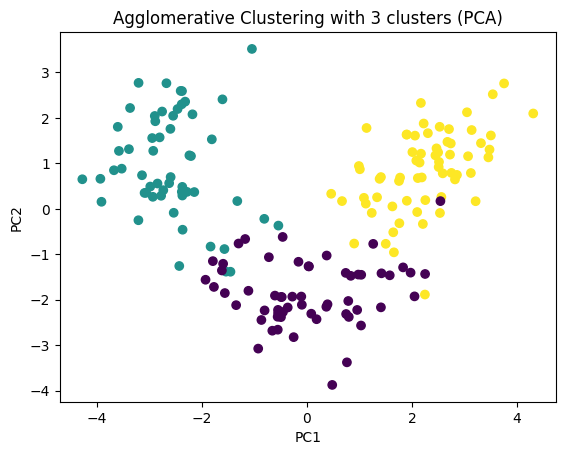

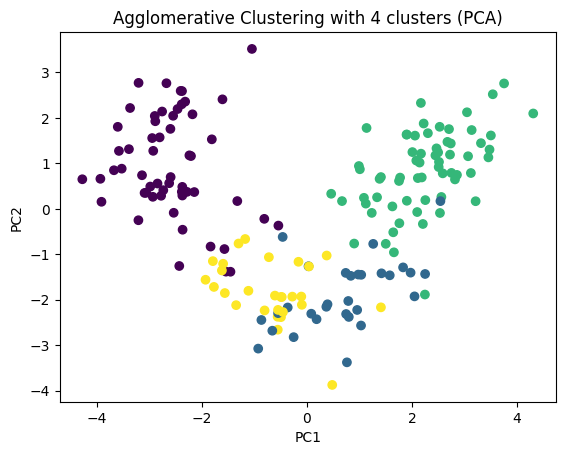

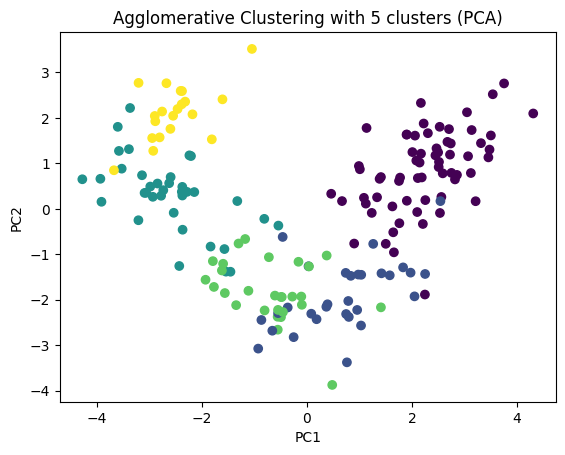

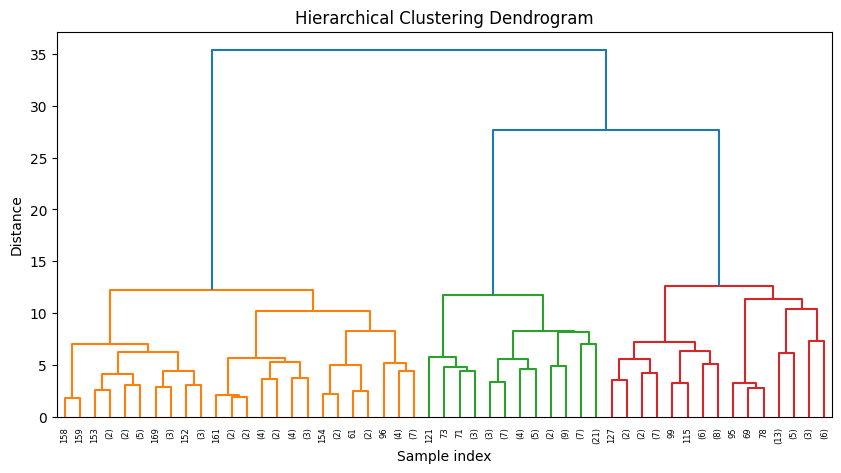

In [2]:
# ------------------------------------------------------
# Step 2: Hierarchical Clustering
# ------------------------------------------------------
print("\n=== Hierarchical Clustering ===")

for n_clusters in [2, 3, 4, 5]:
    hc = AgglomerativeClustering(n_clusters=n_clusters)
    labels_hc = hc.fit_predict(X_scaled)
    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hc)
    plt.title(f"Agglomerative Clustering with {n_clusters} clusters (PCA)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

# Dendrogram
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()



=== DBSCAN Clustering ===


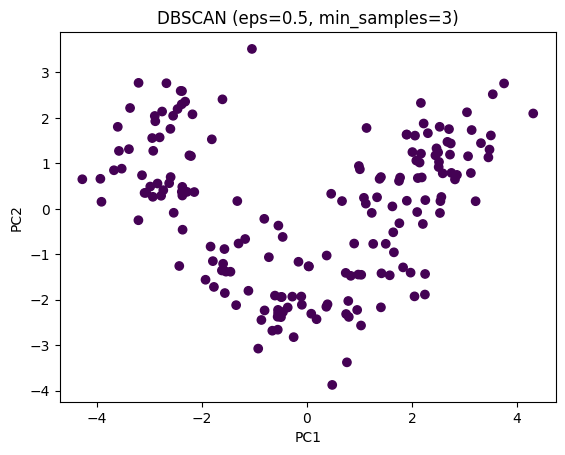

DBSCAN (eps=0.5, min_samples=3) formed only one cluster or all points are noise.


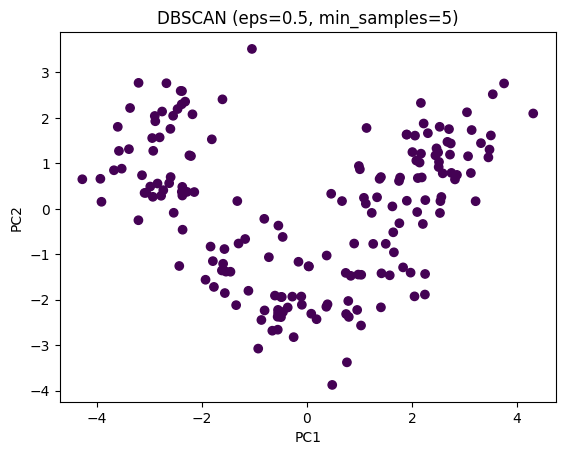

DBSCAN (eps=0.5, min_samples=5) formed only one cluster or all points are noise.


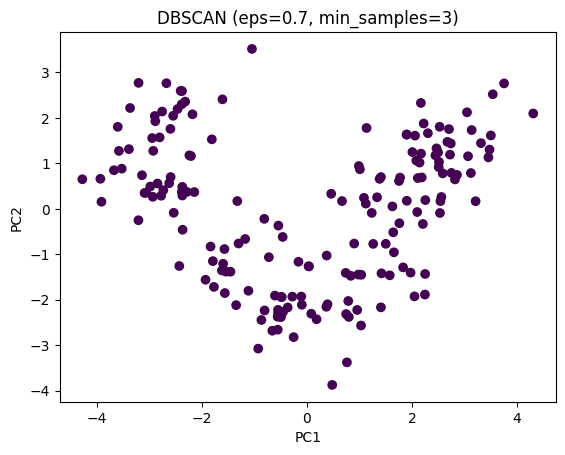

DBSCAN (eps=0.7, min_samples=3) formed only one cluster or all points are noise.


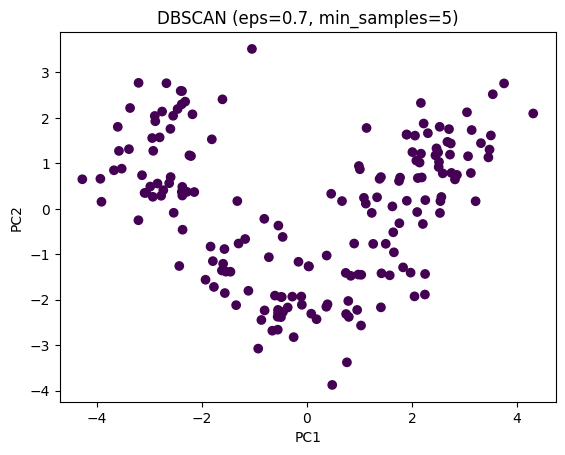

DBSCAN (eps=0.7, min_samples=5) formed only one cluster or all points are noise.


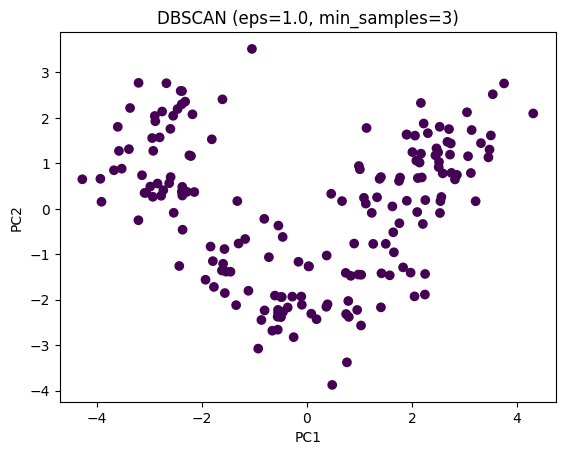

DBSCAN (eps=1.0, min_samples=3) formed only one cluster or all points are noise.


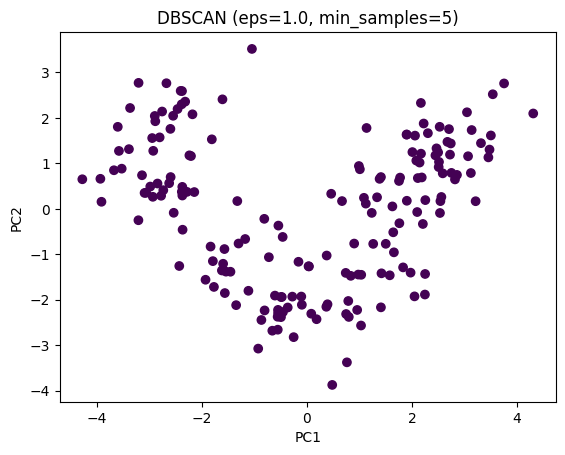

DBSCAN (eps=1.0, min_samples=5) formed only one cluster or all points are noise.


In [3]:
# ------------------------------------------------------
# Step 3: DBSCAN Clustering
# ------------------------------------------------------
print("\n=== DBSCAN Clustering ===")
eps_values = [0.5, 0.7, 1.0]
min_samples_values = [3, 5]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(X_scaled)

        plt.figure()
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan)
        plt.title(f"DBSCAN (eps={eps}, min_samples={min_samples})")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.show()

        if len(set(labels_dbscan)) > 1:
            silhouette = silhouette_score(X_scaled, labels_dbscan)
            homogeneity = homogeneity_score(y, labels_dbscan)
            completeness = completeness_score(y, labels_dbscan)
            print(f"Metrics for DBSCAN (eps={eps}, min_samples={min_samples}):")
            print(f" Silhouette Score: {silhouette:.4f}")
            print(f" Homogeneity Score: {homogeneity:.4f}")
            print(f" Completeness Score: {completeness:.4f}")
        else:
            print(f"DBSCAN (eps={eps}, min_samples={min_samples}) formed only one cluster or all points are noise.")


In [4]:
# ------------------------------------------------------
# Step 4: Summary & Comparison
# ------------------------------------------------------
print("\n=== Summary and Comparison ===")
print("""
- Hierarchical clustering was straightforward and allowed clear visualization using dendrograms.
- Adjusting n_clusters helped find meaningful groupings, often matching 3 clusters (similar to wine classes).
- DBSCAN required careful tuning of eps and min_samples to balance cluster formation versus noise detection.
- DBSCAN is effective in detecting noise/outliers, while Hierarchical clustering is better for structure understanding.
- PCA was used to help visualize clustering since original data dimensions are high.
""")


=== Summary and Comparison ===

- Hierarchical clustering was straightforward and allowed clear visualization using dendrograms.
- Adjusting n_clusters helped find meaningful groupings, often matching 3 clusters (similar to wine classes).
- DBSCAN required careful tuning of eps and min_samples to balance cluster formation versus noise detection.
- DBSCAN is effective in detecting noise/outliers, while Hierarchical clustering is better for structure understanding.
- PCA was used to help visualize clustering since original data dimensions are high.

